In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from statistics import mode

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from statistics import mode


car_2017 = pd.read_csv('car_2017.csv')#data from wisconson univ 

car=car_2017.drop(['End_Lat', 'End_Lng','Source'], axis=1)
car.dropna(subset = ["Number","Precipitation(in)","Wind_Speed(mph)","Wind_Direction","Visibility(mi)","Pressure(in)","Humidity(%)","Temperature(F)","Wind_Chill(F)","Severity"], inplace=True)
car = car.reset_index(drop=True)

car_weather=car.drop(['ID','TMC','Start_Time','End_Time','Start_Lat','Start_Lng','Distance(mi)','Description','Number','Street','Side','City','County','State','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp','Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1)
#car_weather=car.drop([])

pd.set_option('display.max_columns', None)
car_weather.head()


,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2,37.4,33.8,93.0,30.00,4.0,4.6,0.02
1,2,32.0,24.8,100.0,29.95,0.8,8.1,0.02
2,2,32.0,24.8,100.0,29.95,0.8,8.1,0.02
3,2,32.0,24.2,100.0,29.96,0.5,9.2,0.08
4,3,46.0,42.5,86.0,30.04,10.0,6.9,0.01


In [14]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [11]:
from itertools import combinations 
 
features=list(car_weather)
features.remove('Severity')
#print(list(features))
comb = combinations(list(features), 3) 
print(list(comb))
      

[('Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)'), ('Temperature(F)', 'Wind_Chill(F)', 'Pressure(in)'), ('Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)'), ('Temperature(F)', 'Wind_Chill(F)', 'Wind_Speed(mph)'), ('Temperature(F)', 'Wind_Chill(F)', 'Precipitation(in)'), ('Temperature(F)', 'Humidity(%)', 'Pressure(in)'), ('Temperature(F)', 'Humidity(%)', 'Visibility(mi)'), ('Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)'), ('Temperature(F)', 'Humidity(%)', 'Precipitation(in)'), ('Temperature(F)', 'Pressure(in)', 'Visibility(mi)'), ('Temperature(F)', 'Pressure(in)', 'Wind_Speed(mph)'), ('Temperature(F)', 'Pressure(in)', 'Precipitation(in)'), ('Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)'), ('Temperature(F)', 'Visibility(mi)', 'Precipitation(in)'), ('Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)'), ('Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)'), ('Wind_Chill(F)', 'Humidity(%)', 'Visibility(mi)'), ('Wind_Chill(F)', 'Humidity(%)', 'Wind_Speed(mph)'), ('Wind_Chill(F

In [8]:
from pandas import DataFrame

features=list(car_weather)
features.remove('Severity')
#print(list(features))
comb = combinations(list(features), 3) 
p=list(comb)

df = DataFrame(p,columns=['feature 1','feature 2','feature 3'])
print (df)

         feature 1        feature 2          feature 3
0   Temperature(F)    Wind_Chill(F)        Humidity(%)
1   Temperature(F)    Wind_Chill(F)       Pressure(in)
2   Temperature(F)    Wind_Chill(F)     Visibility(mi)
3   Temperature(F)    Wind_Chill(F)    Wind_Speed(mph)
4   Temperature(F)    Wind_Chill(F)  Precipitation(in)
5   Temperature(F)      Humidity(%)       Pressure(in)
6   Temperature(F)      Humidity(%)     Visibility(mi)
7   Temperature(F)      Humidity(%)    Wind_Speed(mph)
8   Temperature(F)      Humidity(%)  Precipitation(in)
9   Temperature(F)     Pressure(in)     Visibility(mi)
10  Temperature(F)     Pressure(in)    Wind_Speed(mph)
11  Temperature(F)     Pressure(in)  Precipitation(in)
12  Temperature(F)   Visibility(mi)    Wind_Speed(mph)
13  Temperature(F)   Visibility(mi)  Precipitation(in)
14  Temperature(F)  Wind_Speed(mph)  Precipitation(in)
15   Wind_Chill(F)      Humidity(%)       Pressure(in)
16   Wind_Chill(F)      Humidity(%)     Visibility(mi)
17   Wind_

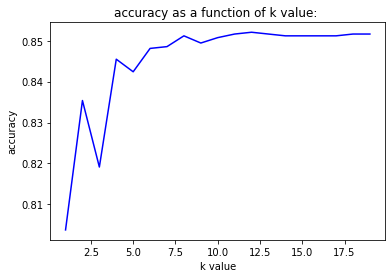

0.8520632133450395


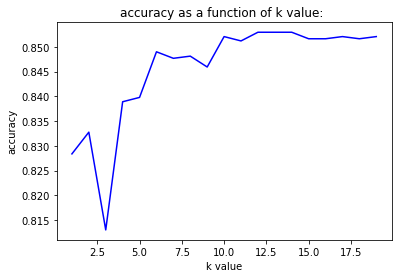

0.8529411764705882


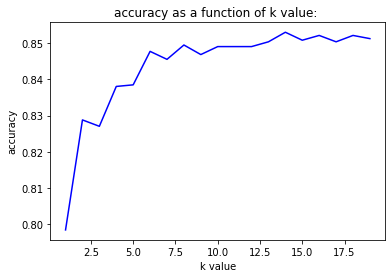

0.8529411764705882


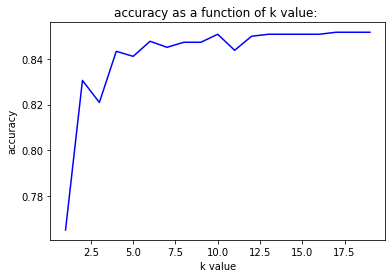

0.8516242317822651


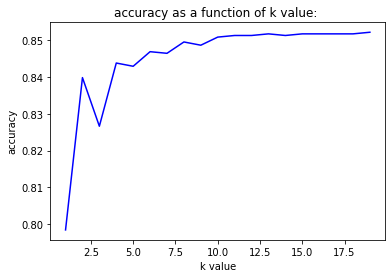

0.8520632133450395


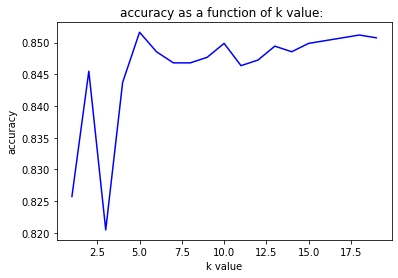

0.8516242317822651


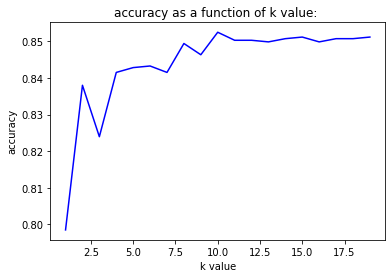

0.8525021949078139


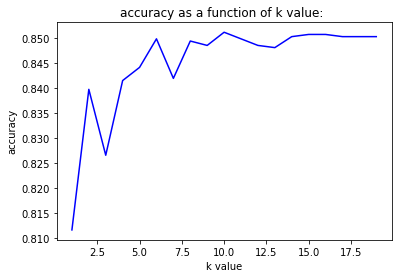

0.8511852502194908


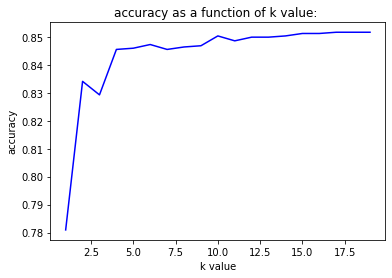

0.8516242317822651


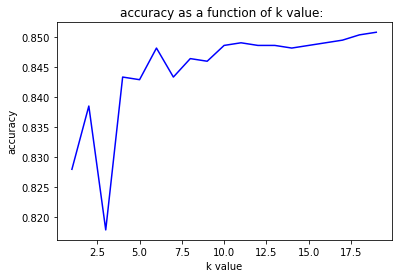

0.8507462686567164


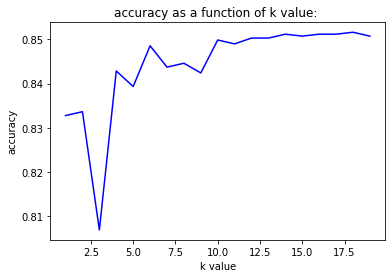

0.8516242317822651


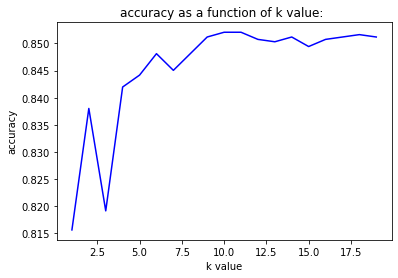

0.8520632133450395


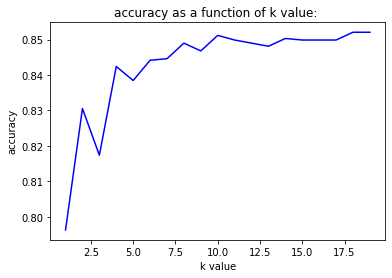

0.8520632133450395


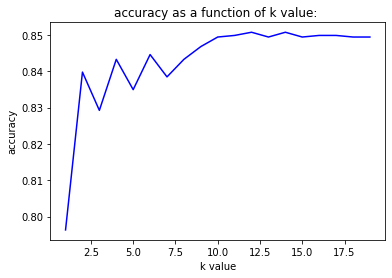

0.8507462686567164


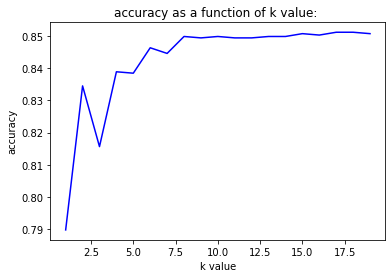

0.8511852502194908


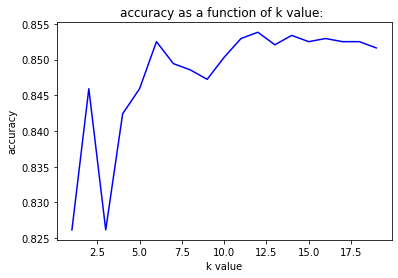

0.853819139596137


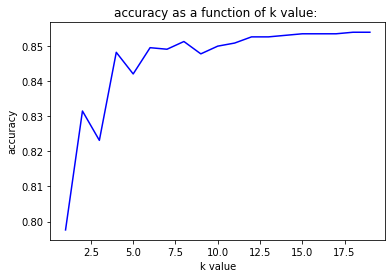

0.853819139596137


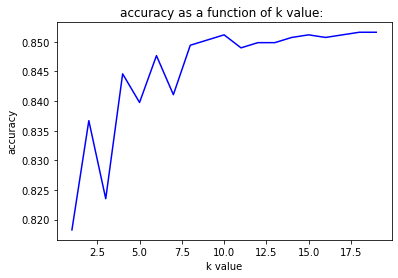

0.8516242317822651


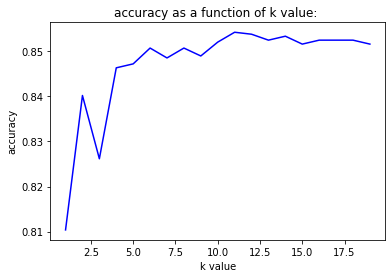

0.8542581211589113


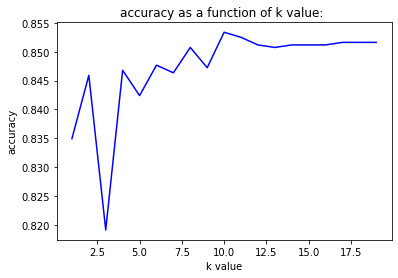

0.8533801580333626


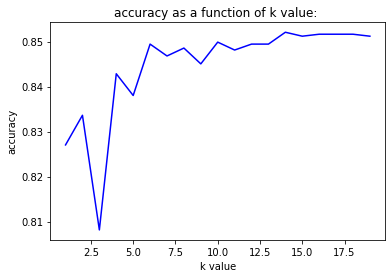

0.8520632133450395


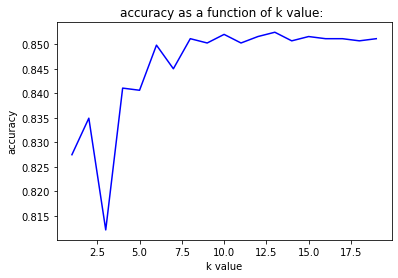

0.8525021949078139


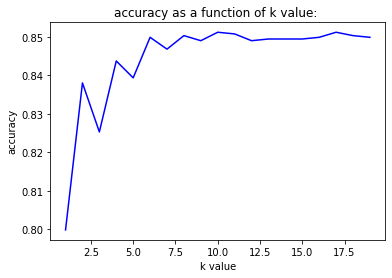

0.8511852502194908


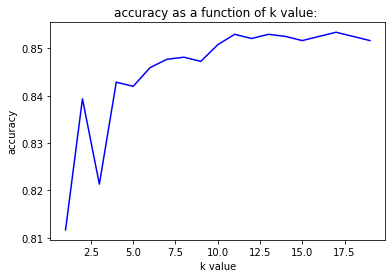

0.8533801580333626


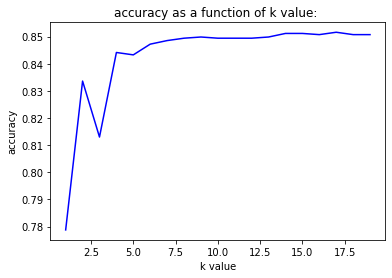

0.8516242317822651


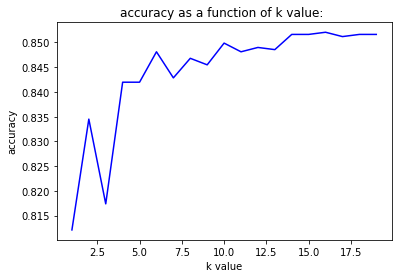

0.8520632133450395


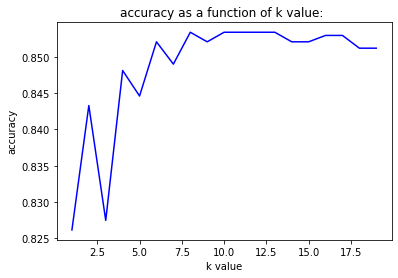

0.8533801580333626


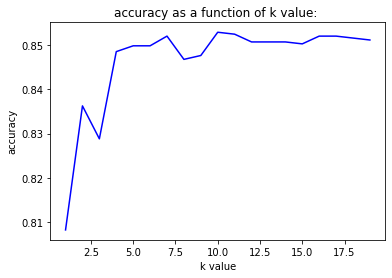

0.8529411764705882


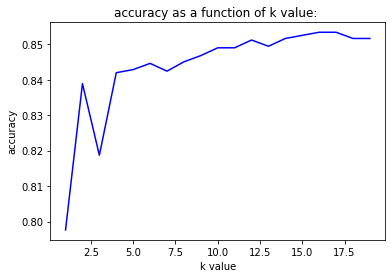

0.8533801580333626


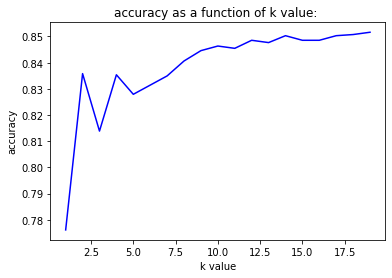

0.8516242317822651


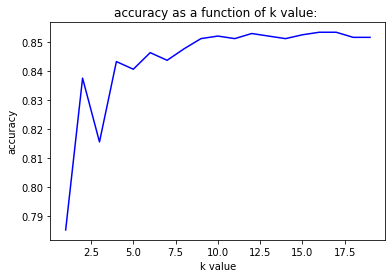

0.8533801580333626


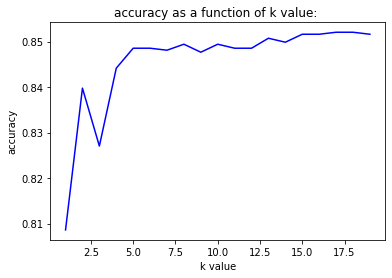

0.8520632133450395


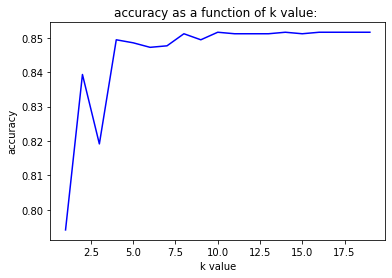

0.8516242317822651


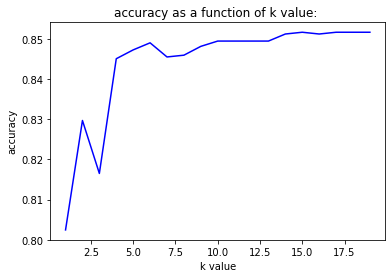

0.8516242317822651


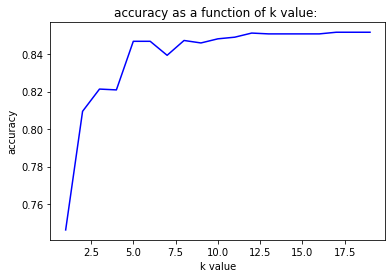

0.8516242317822651


In [28]:
# A Python program to print all  
# combinations of given length 
from itertools import combinations 

#generate all combinations of features
features=list(car_weather)
features.remove('Severity')
comb = combinations(list(features), 3) 

maxlist=[]
modelist=[]

for i in comb: 
   
    X = car_weather[[i[0],i[1],i[2]]]
    y = car_weather['Severity']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
    
    #creates 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X_train[i[0]], X_train[i[1]], X_train[i[2]],
        c = y_train, marker = 'o', s=100)
    ax.set_xlabel(i[0])
    ax.set_ylabel(i[1])
    ax.set_zlabel(i[2])
    plt.show()
    
    
    #writes graph image to file
    output_dir = "comparison_chart_k=3"
    mkdir_p(output_dir)
    ss = str(i[0]+i[1]+i[2])
    s = '{}/'+ss+'.png'
    fig.savefig(s.format(output_dir))
    
    lst=[]

    for u in range(1,20):
        knn = KNeighborsClassifier(n_neighbors = u)
        knn.fit(X_train, y_train)
        i = knn.score(X_test, y_test)
        lst.append(i)

    a = np.arange(1, 20)  
    b = lst
    
    # plotting 
    plt.title("accuracy as a function of k value: ")  
    plt.xlabel("k value")  
    plt.ylabel("accuracy")  
    plt.plot(a, b, color ="blue")  
    #fig2 = plt.figure()
    plt.show()
    
    #output_dir = "accuracy_chart_k=3"
    #mkdir_p(output_dir)
    #ss = str(i[0]+i[1]+i[2])
    #s = '{}/'+ss+'.png'
    #fig2.savefig(s.format(output_dir))
    
    
    print(max(lst))
    maxlist.append(max(lst))
    #modelist.append(mode(lst))
    

In [24]:
maxlist.index(max(maxlist))
maxlist.index(max(maxlist))

#windchill, humidity, precipitation

18

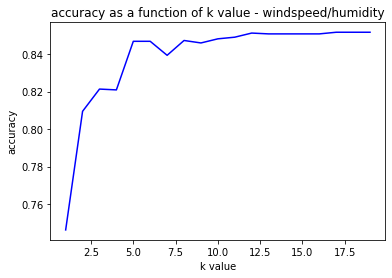

In [25]:
lst=[]

for u in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = u)
    knn.fit(X_train, y_train)
    i = knn.score(X_test, y_test)
    lst.append(i)
    
a = np.arange(1, 20)  
b = lst
  
# plotting 
plt.title("accuracy as a function of k value - windspeed/humidity")  
plt.xlabel("k value")  
plt.ylabel("accuracy")  
plt.plot(a, b, color ="blue")  
plt.show()